In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df=pd.read_csv(r"./data.csv")
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

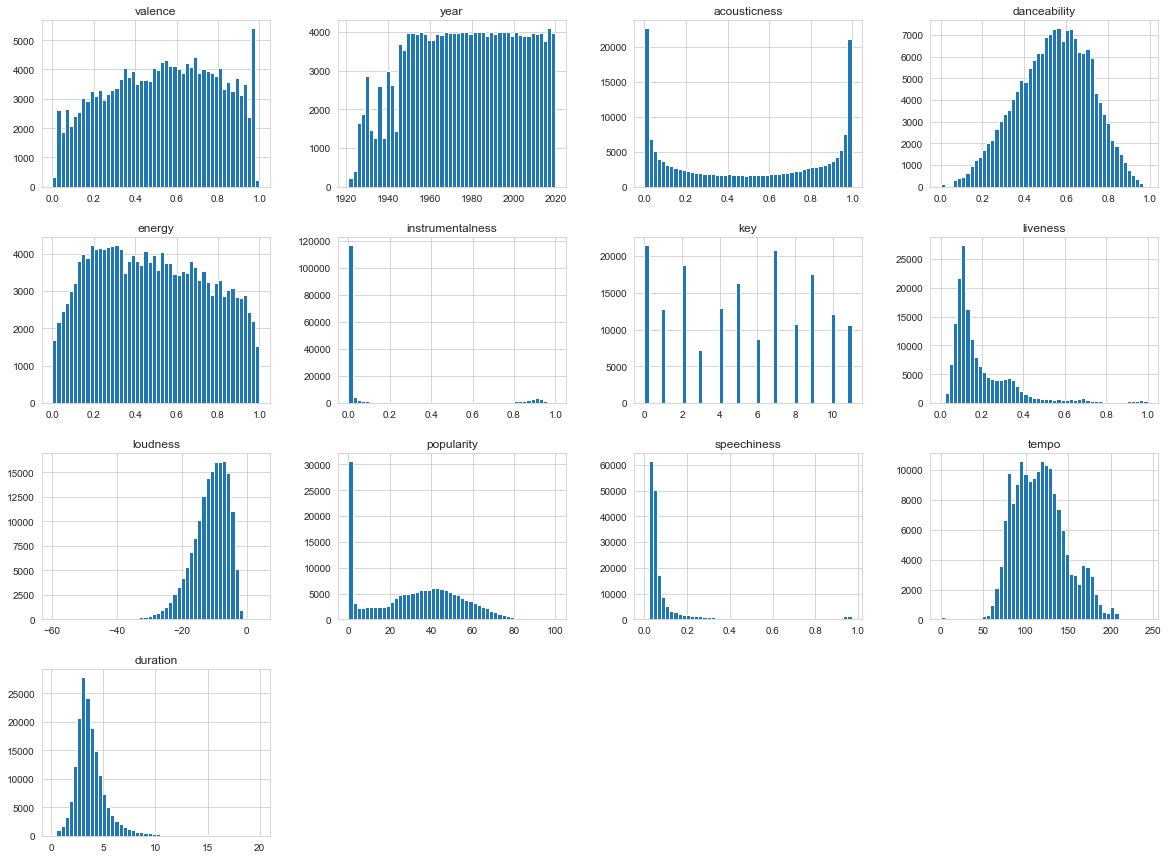

In [29]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df.describe()

In [5]:
#i have the year so i know the exact date won't help me here so i can delete it , and i want to change the duration to minuets
#instead of miliseconds
df['duration']=df['duration_ms']/60000
df=df.drop(columns=['duration_ms','release_date','id','name'],axis =1)
#df =df.drop_duplicates(keep='first',inplace=True)

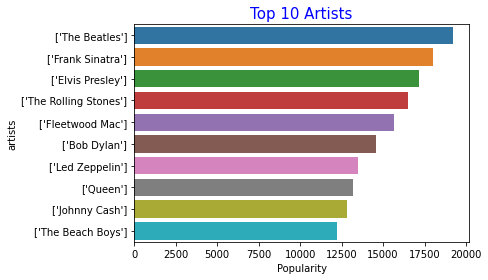

In [6]:
#lets see the 10 most popular artists
fig,ax=plt.subplots()
lead_artists=df.groupby('artists')['popularity'].sum().sort_values(ascending=False)
ten_lead=lead_artists.head(10)
ax=sns.barplot(x=ten_lead.values,y=ten_lead.index)
ax.set_xlabel("Popularity")
ax.set_title("Top 10 Artists",c='b',fontsize=15)
plt.show()

<AxesSubplot:>

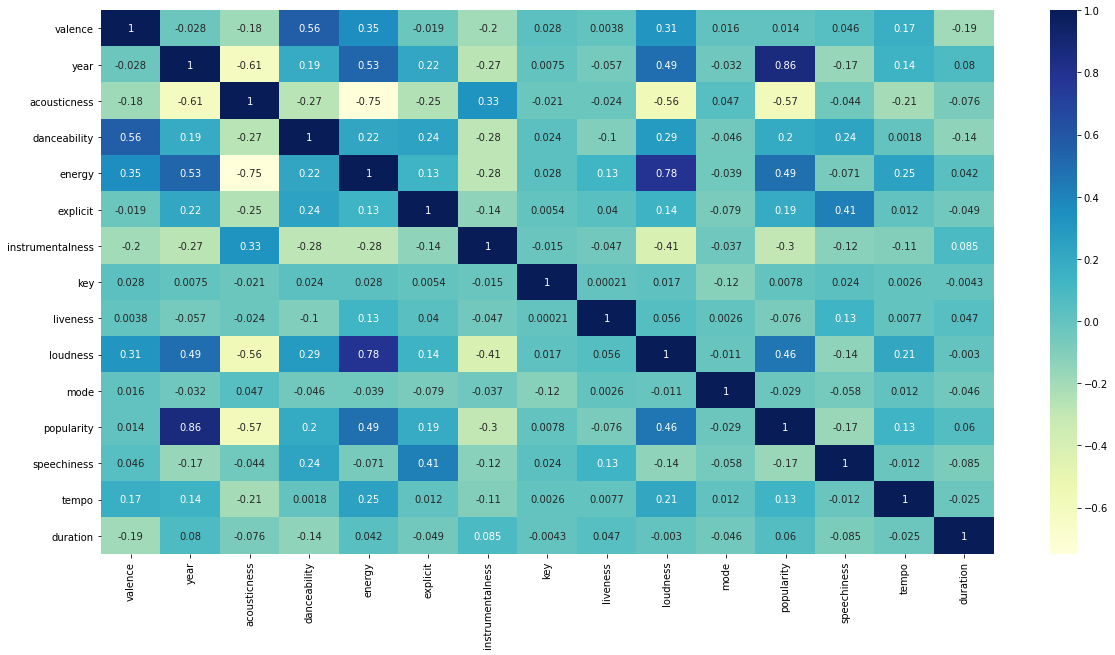

In [7]:
#i want to know the correalation between each featurre
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='year', ylabel='popularity'>

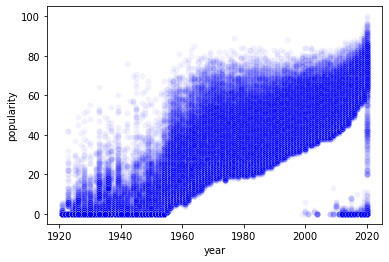

In [8]:
sns.scatterplot(x='year',y='popularity',data=df,alpha=0.05,color='b')
#alpha means the density between the dots

<AxesSubplot:xlabel='energy', ylabel='popularity'>

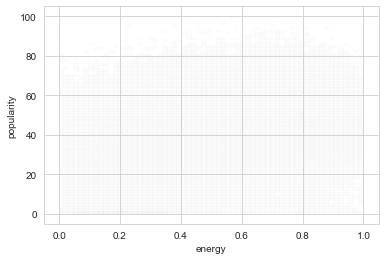

In [30]:
sns.histplot(data=df,x='energy',y='popularity',alpha= 0.05,color='black')

<AxesSubplot:xlabel='key', ylabel='popularity'>

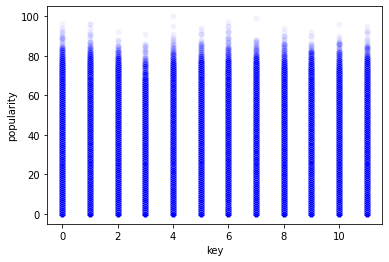

In [10]:
sns.scatterplot(x='key',y='popularity',data=df,alpha=0.05,color='b')
#we can see some correlation between the octav key and the popularity
#nobody likes a screaming song

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

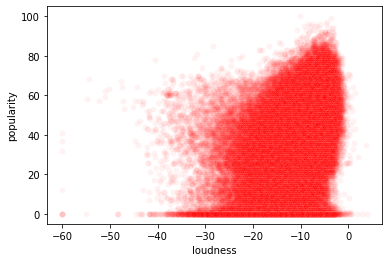

In [11]:
sns.scatterplot(x='loudness',y='popularity',data=df,alpha=0.05,color='r')

In [12]:
"""now that we showed some cool stuff related to the data lets clean it
some more , lets check any outliners , we want our songs to be max 20 min
on which i can see that are nature sounds and such"""
df=df[df['duration']<20]

<AxesSubplot:>

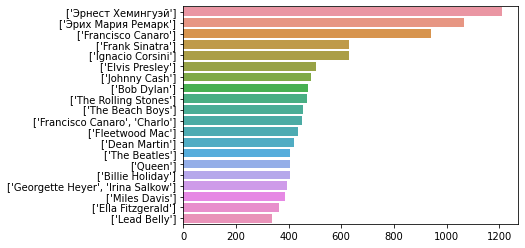

In [13]:
most_songs=df['artists'].value_counts().head(20)
sns.barplot(x=most_songs.values,y=most_songs.index)

<AxesSubplot:title={'center':'Growth of popularity'}, xlabel='year'>

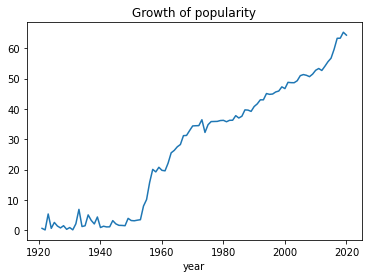

In [14]:
"""we show here the growth of the popularity over the years"""
df.groupby('year')['popularity'].mean().plot(title="Growth of popularity")

<AxesSubplot:xlabel='year'>

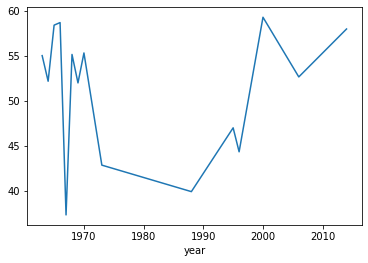

In [15]:
"""here we can see the growth of the beatles over the years"""
emi=df[df['artists']=="['The Beatles']"]
emi.groupby('year')['popularity'].mean().plot()

c:\users\talso\desktop\aiex\final project\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

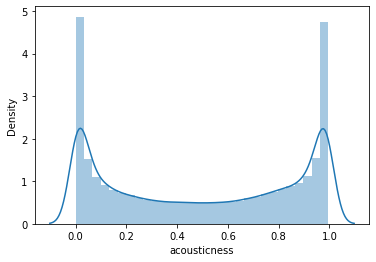

In [16]:
sns.distplot(df['acousticness'], bins=30)

c:\users\talso\desktop\aiex\final project\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


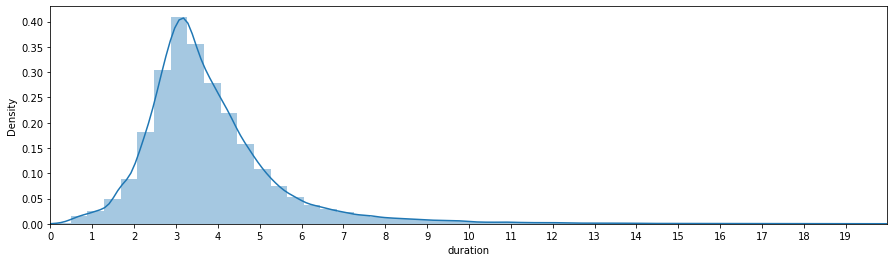

In [17]:
fig3, ax2 = plt.subplots(figsize = (15, 4))
ax2 = sns.distplot(df['duration'])
ax2.set_xticks(range(0,20,1))
ax2.set_xlim(0,20)
plt.show()

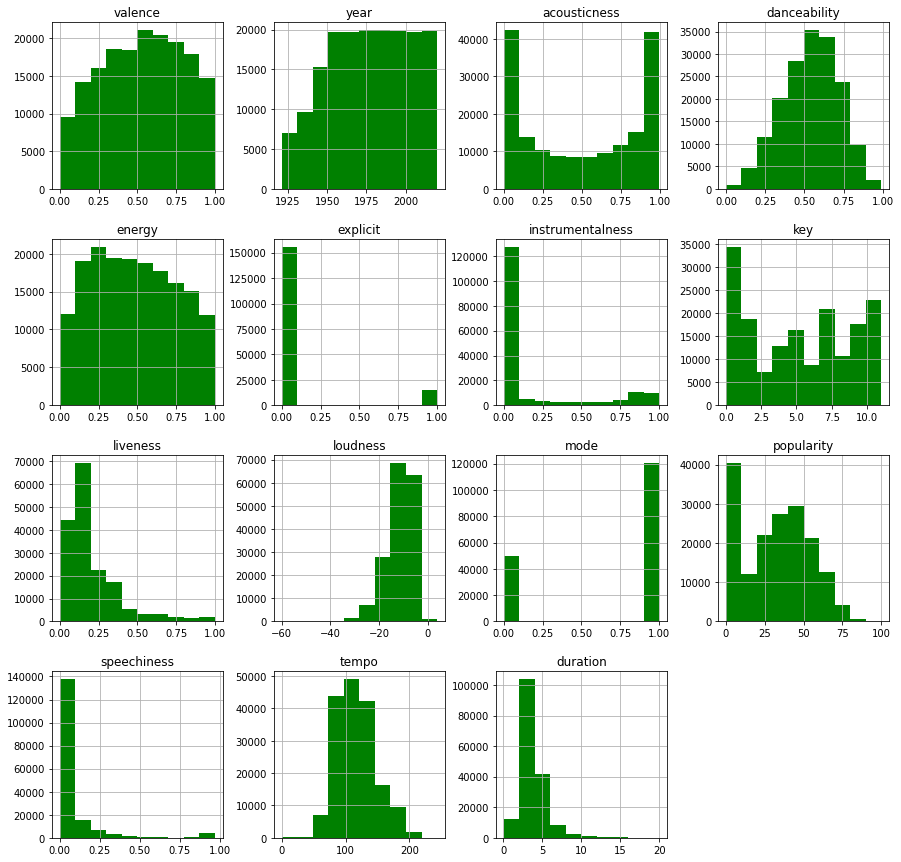

In [18]:
df.hist(figsize=(15,15),color='green')
plt.show()

c:\users\talso\desktop\aiex\final project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

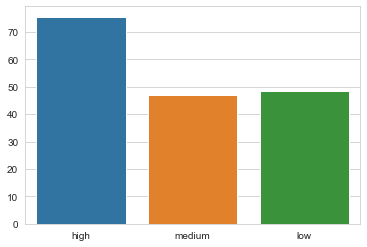

In [19]:
sns.set_style("whitegrid")
h=df[df['popularity']>70]
m=df[(df['popularity']<70)&(df['popularity']>30)]
l=df[df['popularity']>30]
h1=h.popularity.mean()
m1=m.popularity.mean()
l1=l.popularity.mean()
sns.barplot(["high","medium","low"],y=[h1,m1,l1])

In [20]:
"""now we want to start model , for now i will drop the artists column as i
dont know how to deal with the string type"""
df=df.drop(columns=['artists','explicit','mode'])

In [23]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df.drop('popularity',axis=1)
                                               ,df['popularity'])

In [24]:
lr.fit(x_train,y_train)
predicts=lr.predict(x_test)
lr.score(x_test,y_test)*100

75.21118460198042

In [26]:
from sklearn.metrics import mean_squared_error
rmse_value = mean_squared_error(y_test, predicts, squared=False)
rmse_value

10.8761748672596

In [28]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train,y_train)
dupred=dummy_clf.predict(x_test)
#rmse_value = mean_squared_error(y_test, dupred, squared=False)
#rmse_value
dummy_clf.score(x_test,y_test)*100

16.34382850837031